# Title: Build a robust predictive model to estimate the `log_price` of homestay listings based on comprehensive analysis of their characteristics, amenities, and host information.

# Submitted by: Moyank Giri, M.Tech DSAI, Indian Institute of Technology, Bhilai
# Submitted for: Cerina Health Recruitment Round - 2

# Mail ID: moyankg@iitbhilai.ac.in
# Github: https://github.com/MoyankGiri
# Linkedin: https://www.linkedin.com/in/moyankgiri/

# Tasks
1. Dataset Loading
2. Data Cleaning, Feature Engineering and Exploratory Data Analysis (EDA):
    * Enhance the dataset by creating actionable and insightful features such as Host_Tenure, Amenities_Count, Days_Since_Last_Review
    * Conduct a deep dive into the dataset to uncover underlying patterns and relationships. Analyze how pricing (`log_price`) correlates with both categorical (such as `room_type` and `property_type`) and numerical features (like `accommodates` and `number_of_reviews`). Utilize statistical tools and visualizations such as correlation matrices, histograms for distribution analysis, and scatter plots to explore relationships between variables.
3. Geospatial Analysis:
    * Investigate the geographical data to understand regional pricing trends. Plot listings on a map using `latitude` and `longitude` data to visually assess price distribution. Examine if certain neighbourhoods or proximity to city centres influence pricing, providing a spatial perspective to the pricing strategy
4. Sentiment Analysis on Textual Data:
    * Apply advanced natural language processing techniques to the `description` texts to extract sentiment scores. Use sentiment analysis tools to determine whether positive or negative descriptions influence listing prices, incorporating these findings into the predictive model being trained as a feature.
5. Amenities Analysis:
    * Thoroughly parse and analyse the `amenities` provided in the listings. Identify which amenities are most associated with higher or lower prices by applying statistical tests to determine correlations, thereby informing both pricing strategy and model inputs.
6. Categorical Data Encoding:
    * Convert categorical data into a format suitable for machine learning analysis. Apply one-hot encoding to variables like `room_type`, `city`, and `property_type`, ensuring that the model can interpret these as distinct features without any ordinal implication.
7. Model Development and Training:
    * Design and train predictive models to estimate `log_price`. Begin with a simple linear regression to establish a baseline, then explore more complex models such as RandomForest and GradientBoosting to better capture non-linear relationships and interactions between features. Document (briefly within Jupyter notebook itself) the model-building process, specifying the choice of algorithms and rationale.
8. Model Optimization and Validation:
    * Systematically optimize the models to achieve the best performance. Employ techniques like grid search to experiment with different hyperparameters settings. Validate model choices through techniques like k-fold cross-validation, ensuring the model generalizes well to unseen data.
9. Feature Importance and Model Insights:
    * Analyze the trained models to identify which features most significantly impact `log_price`. Utilize model-specific methods like feature importance scores for tree-based models and SHAP values for an in-depth understanding of feature contributions.
10. Predictive Performance Assessment:
    * Critically evaluate the performance of the final model on a reserved test set. Use metrics such as Root Mean Squared Error (RMSE) and R-squared to assess accuracy and goodness of fit. Provide a detailed analysis of the residuals to check for any patterns that might suggest model biases or misfit.



All steps are done

# 1. Dataset Loading
The CSV File is loaded into Google Drive and loaded

In [28]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Dataset_cerina/cerina-round2.csv")
pd.set_option('display.max_columns', None)

In [29]:
#Display loaded data
df.head(5)

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",6/18/2016,t,t,NaN,3/26/2012,f,7/18/2016,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,8/5/2017,t,f,100%,6/19/2017,t,9/23/2017,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,4/30/2017,t,t,100%,10/25/2016,t,9/14/2017,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,NaN,t,t,NaN,4/19/2015,f,NaN,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",5/12/2015,t,t,100%,3/1/2015,t,1/22/2017,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


# 2. Data Cleaning, Feature Engineering and Exploratory Data Analysis (EDA)

Steps taken:
1. Initial Data Analysis
    * Missing Value Percentage Calculations
    * Data Describe: Count, Mean, Standard Deviation, Quartiles etc
2. Data Cleaning
    * Handling Missing Values: Using `Mean Imputation` <br>
      * <b>Reason for Mean Imputation</b>: Percentage of Missing Values for variables dependent on other variables is very less (For example, Beds and Bedroom) while for variables with higher percentage of missing values the data is Missing Completely At Random (MCAR)
    * Outlier Removal
    * Duplicates Removal
3. Feature Engineering
    * Created insightful features such as Host_Tenure, Amenities_Count, Days_Since_Last_Review
4. Exploratory Data Analysis
    * `Count Plots` for categorical features like Property type, Room type, Bed type, City etc
    * `Correlation HeatMaps` for understanding linear relations between variables
      * Insights: It can be seen that the target variable (.i.e., log_price) is moderately positively correlated with input features such as accomodates and bedrooms
    * `Histograms` for distribution analysis
      * Insights: The target variable (log_price) follows a Gaussian Distribution (or) a Normal Distribution

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [31]:
## Count the missing values of every column in terms of % and show the result

# calculate the % missing values
percentage_result = df.isnull().sum()/df.shape[0] * 100
# create a DataFrame to show case the result
percentage_result = pd.DataFrame({"columns": percentage_result.keys(), "%": percentage_result})
percentage_result.reset_index(drop=True, inplace=True)
percentage_result

,columns,%
0,id,0.000000
1,log_price,0.000000
2,property_type,0.000000
3,room_type,0.000000
4,amenities,0.000000
5,accommodates,0.000000
6,bathrooms,0.269865
7,bed_type,0.000000
8,cancellation_policy,0.000000
9,cleaning_fee,0.000000


In [32]:
df.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


In [33]:
# Convert 'host_since' and 'last_review' columns to datetime
df['host_since'] = pd.to_datetime(df['host_since'])
df['last_review'] = pd.to_datetime(df['last_review'])

In [34]:
# Calculate Host_Tenure
current_date = datetime.now()
df['Host_Tenure'] = (current_date - df['host_since']).dt.days / 365.25  # Dividing by 365.25 to account for leap years

In [35]:
# Generate Amenities_Count
df['Amenities_Count'] = df['amenities'].apply(lambda x: len(x.split(',')))

In [36]:
# Calculate Days_Since_Last_Review
df['Days_Since_Last_Review'] = (current_date - df['last_review']).dt.days

In [37]:
# Handle outliers
price_99th_percentile = df['log_price'].quantile(0.99)
df['log_price'] = df['log_price'].apply(lambda x: price_99th_percentile if x > price_99th_percentile else x)

In [38]:
# Check for duplicates
print(df.duplicated().sum())

0


In [39]:
# Handling missing values by Imputing missing values in numerical columns with mean
numerical_columns = df.select_dtypes(include=['int', 'float']).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

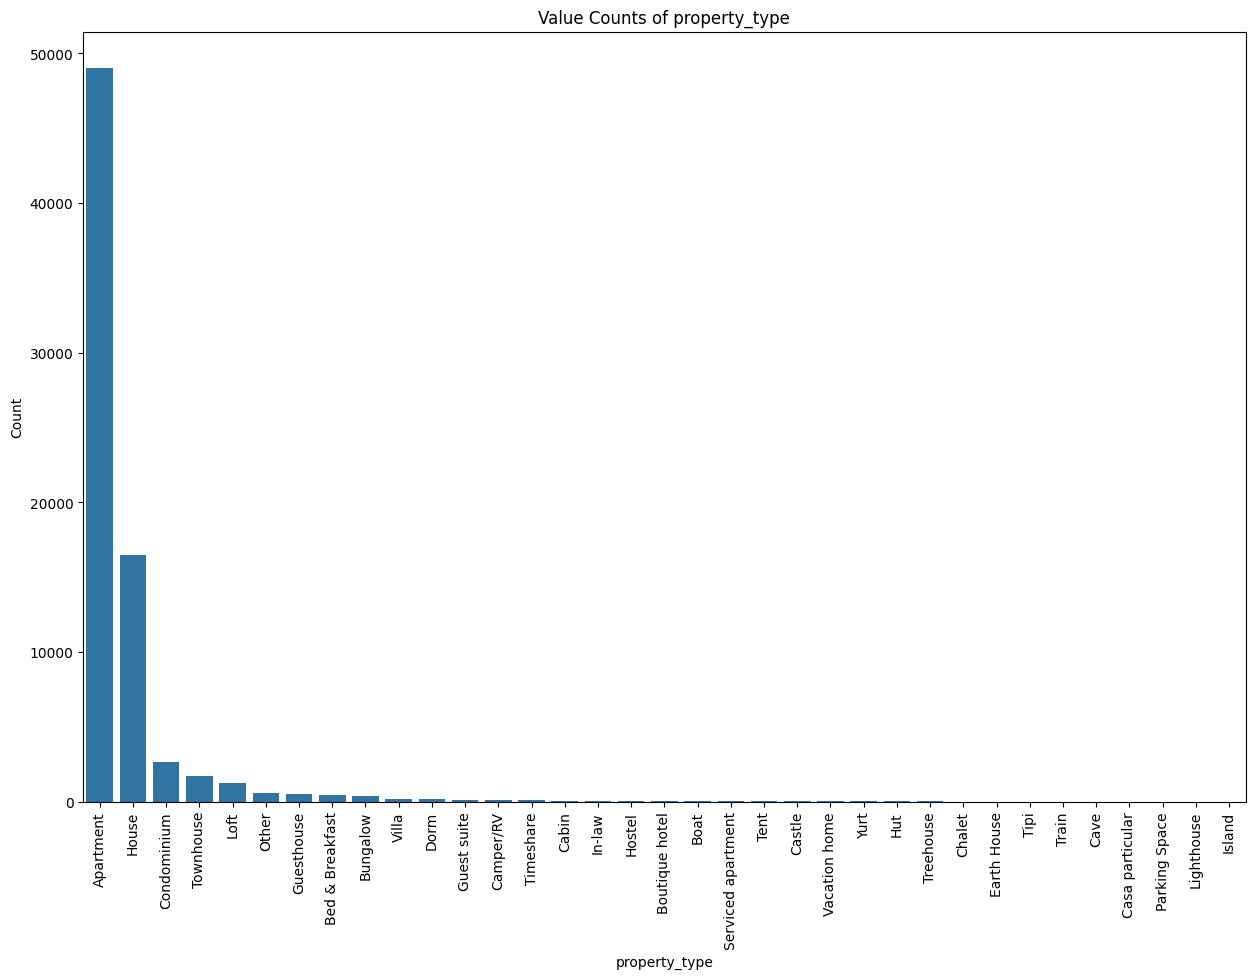

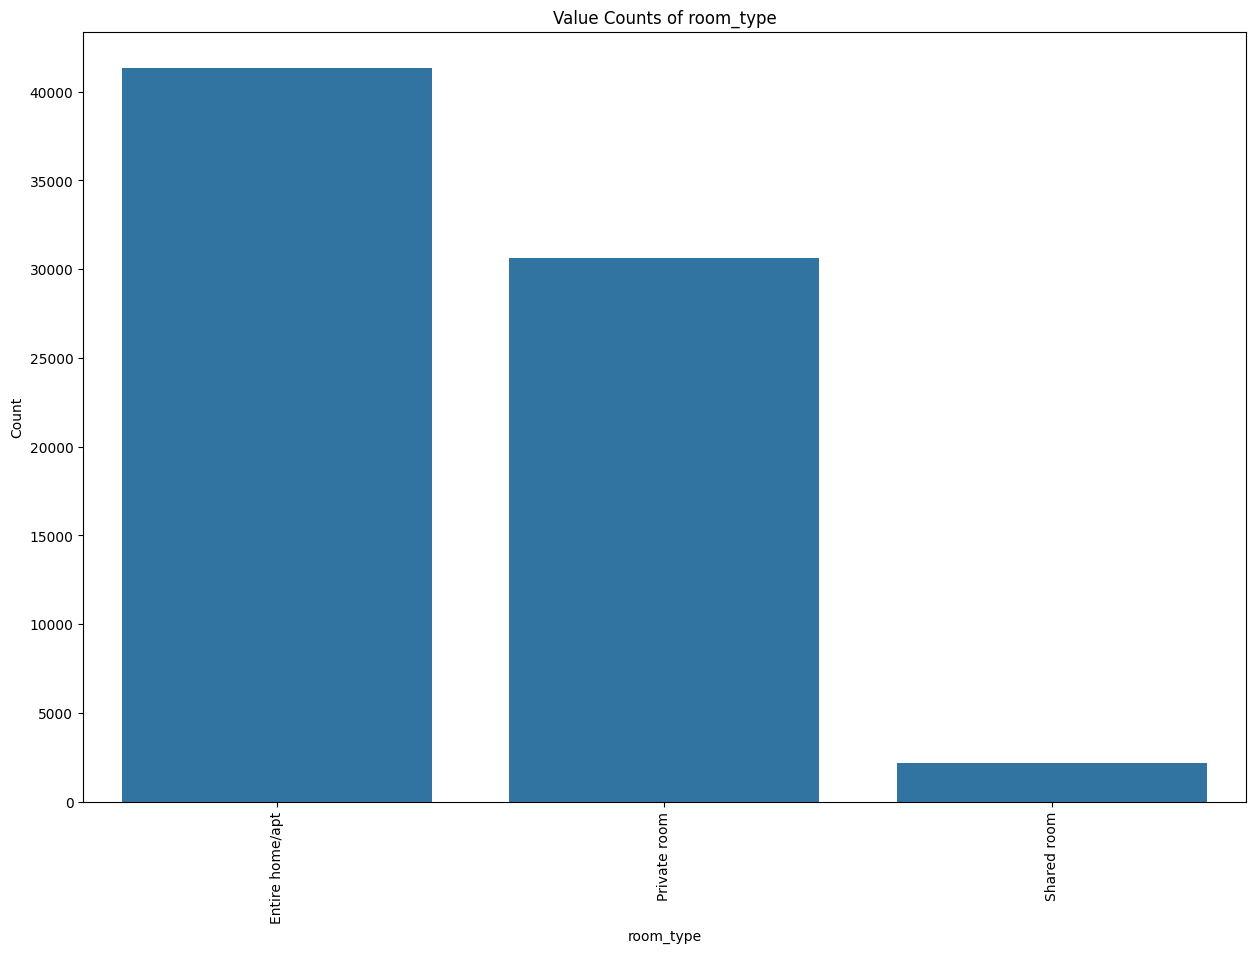

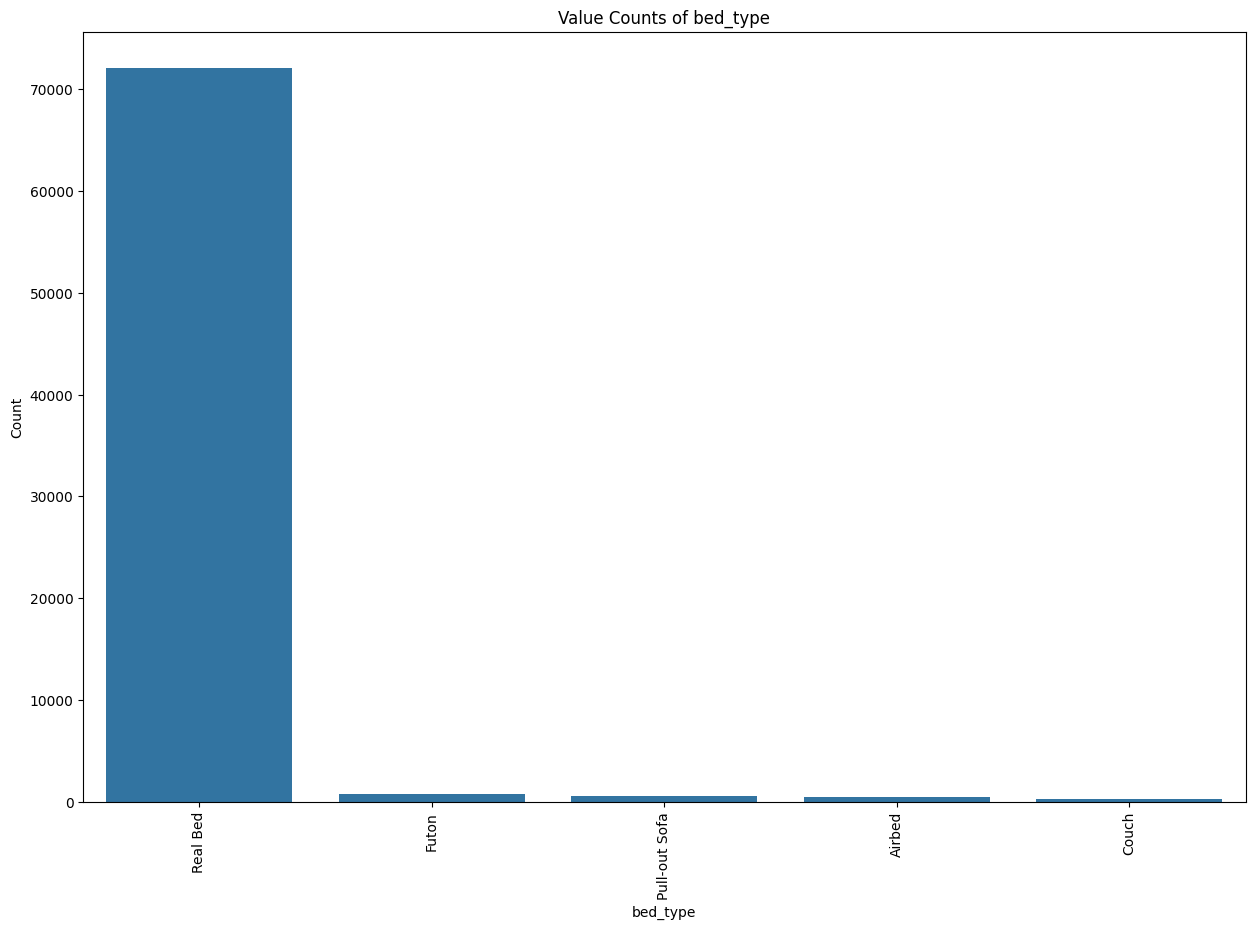

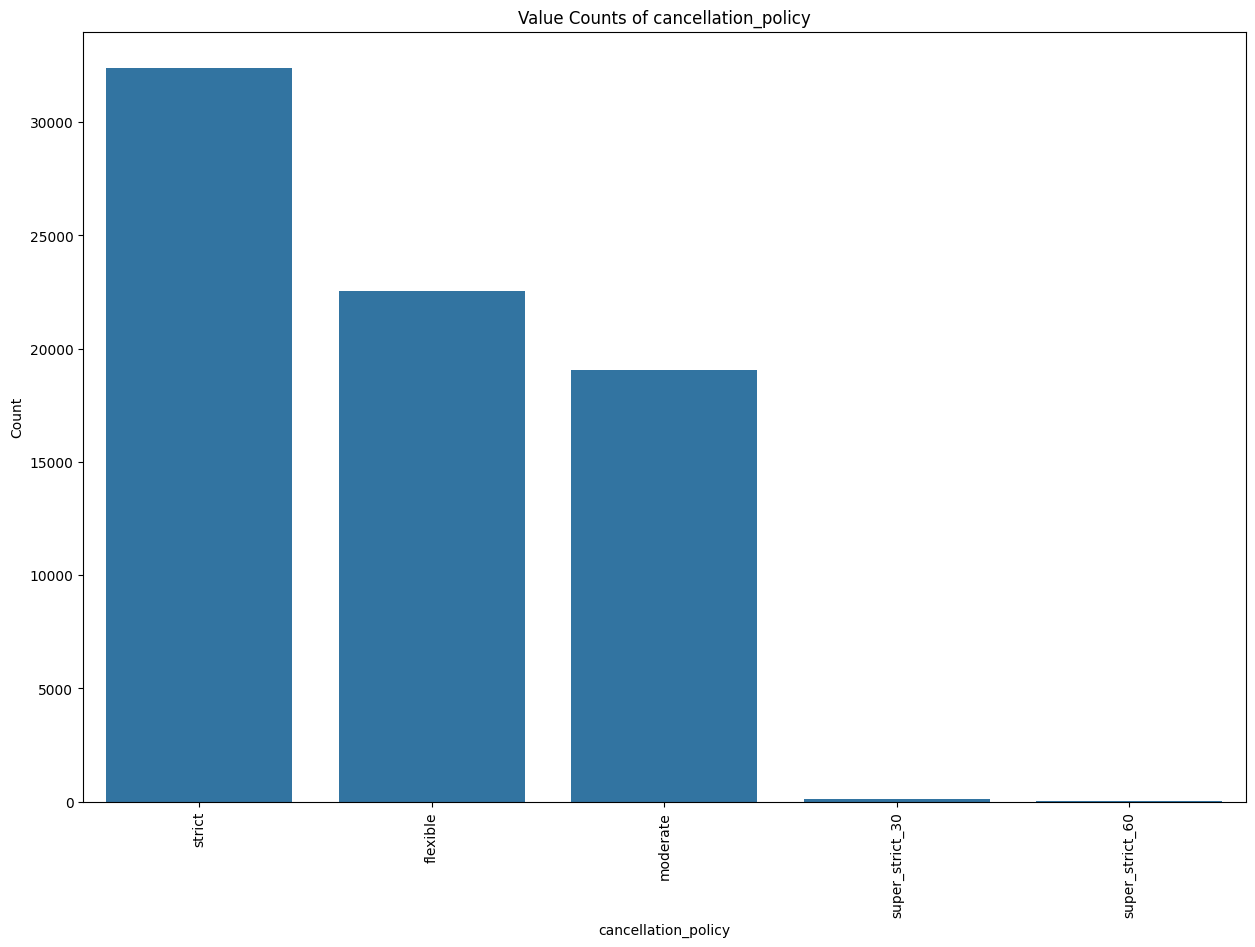

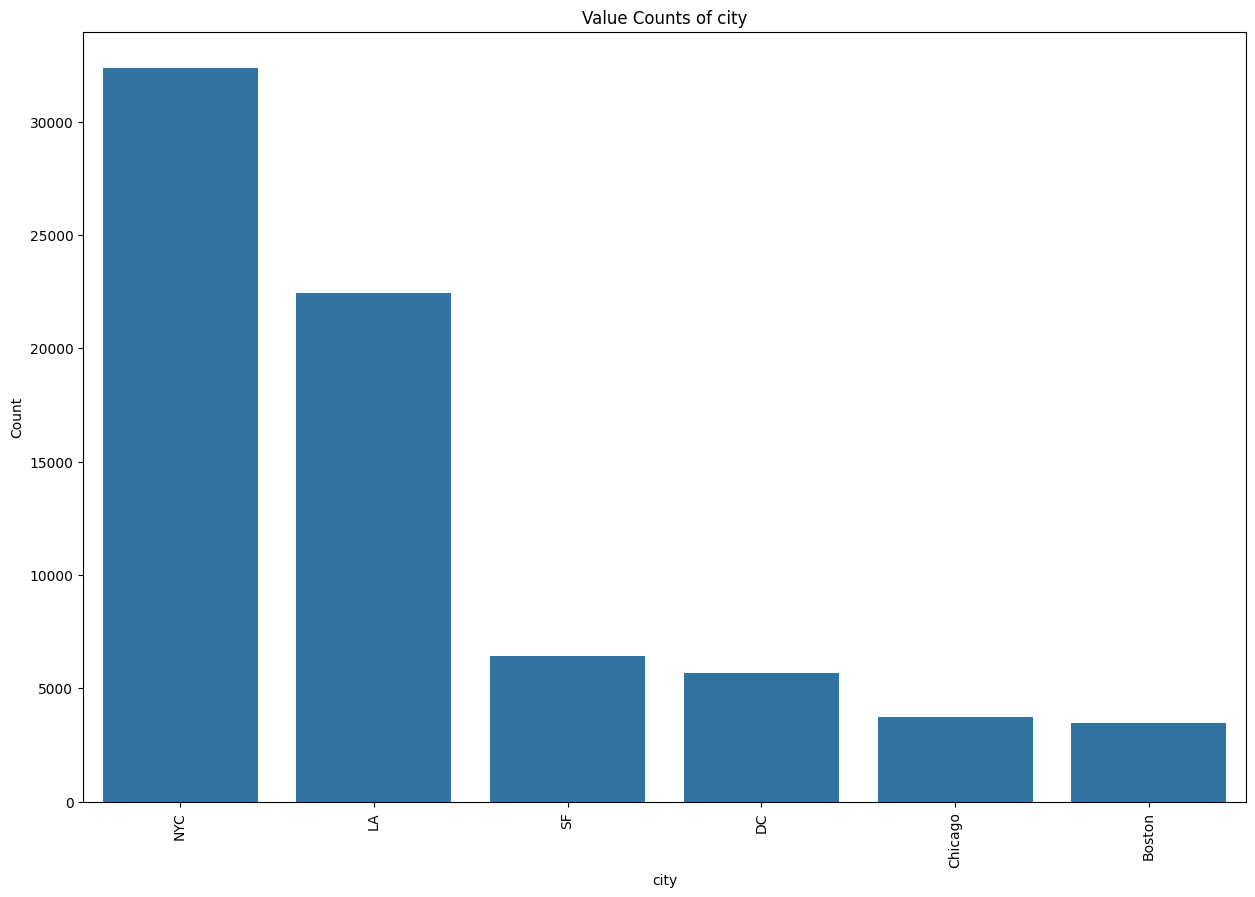

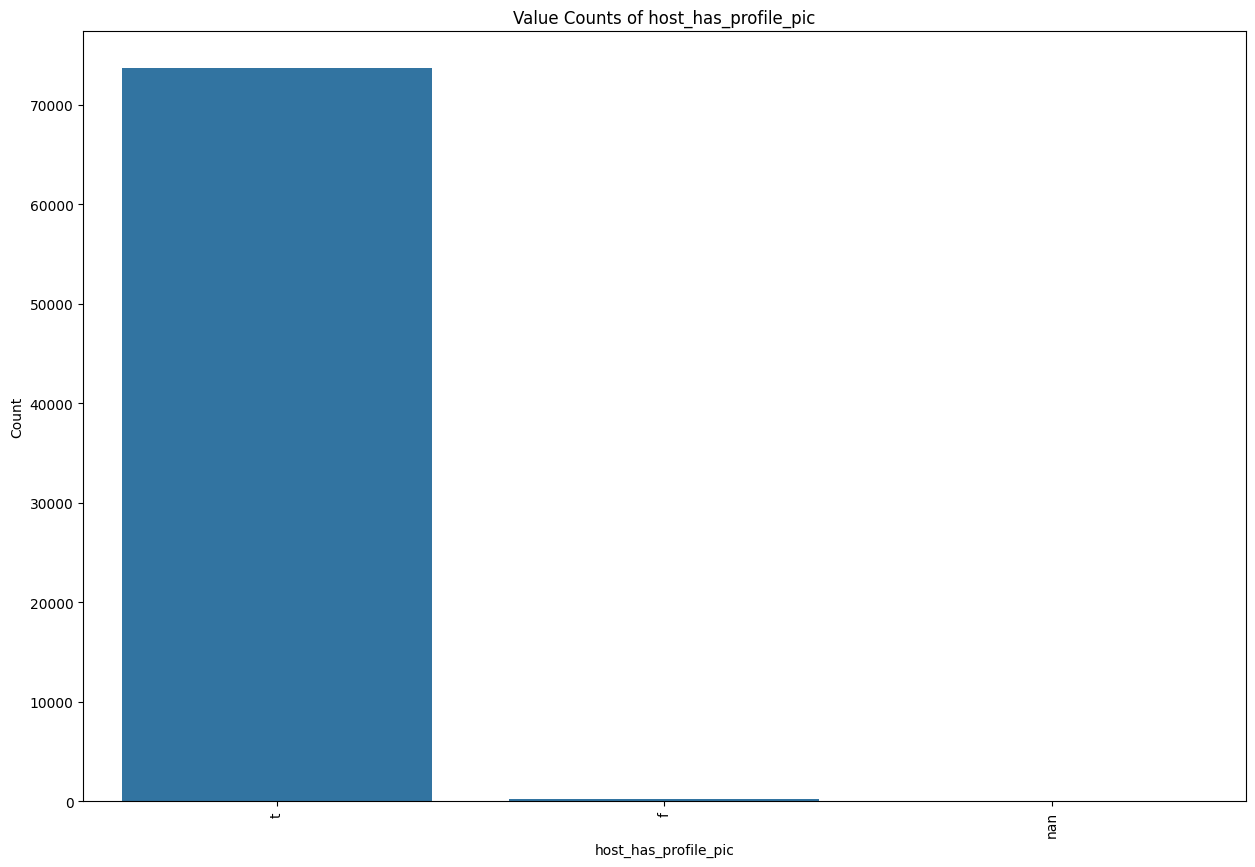

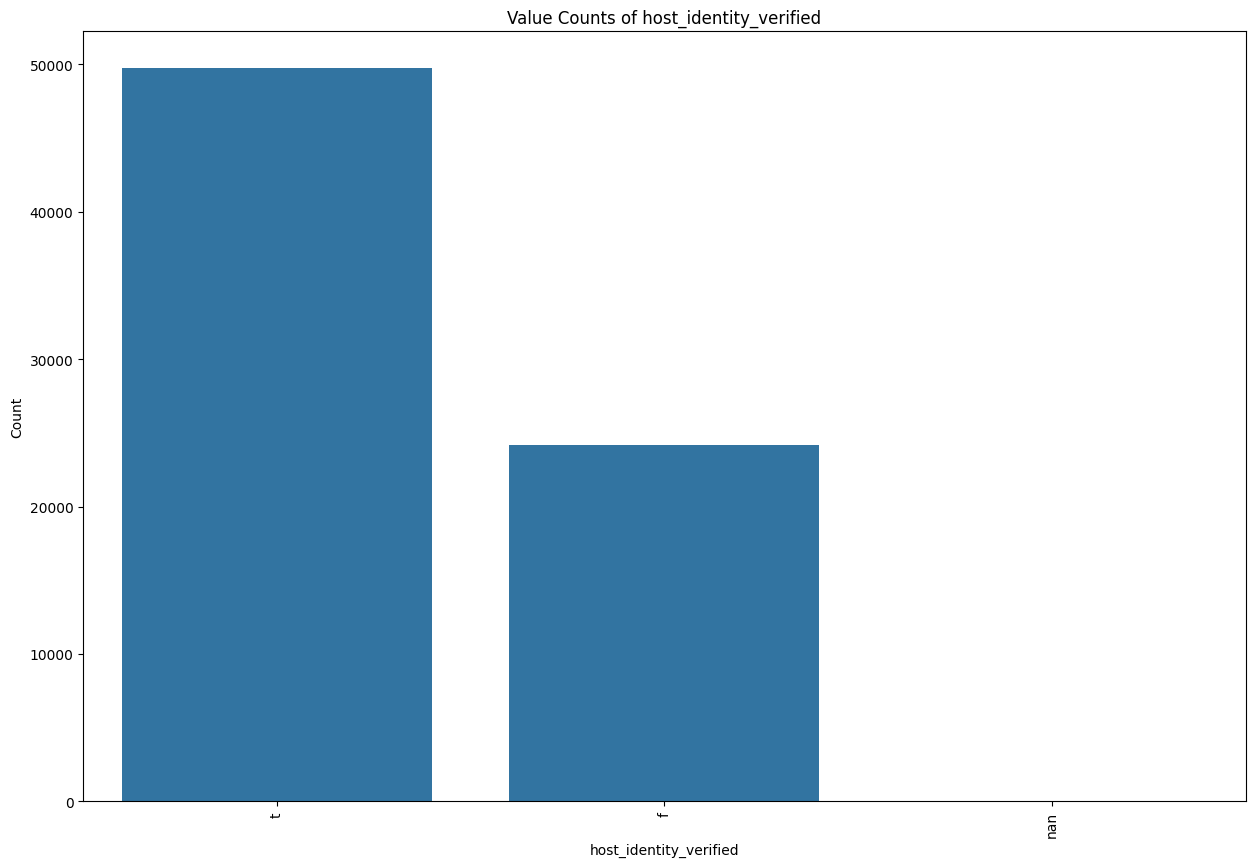

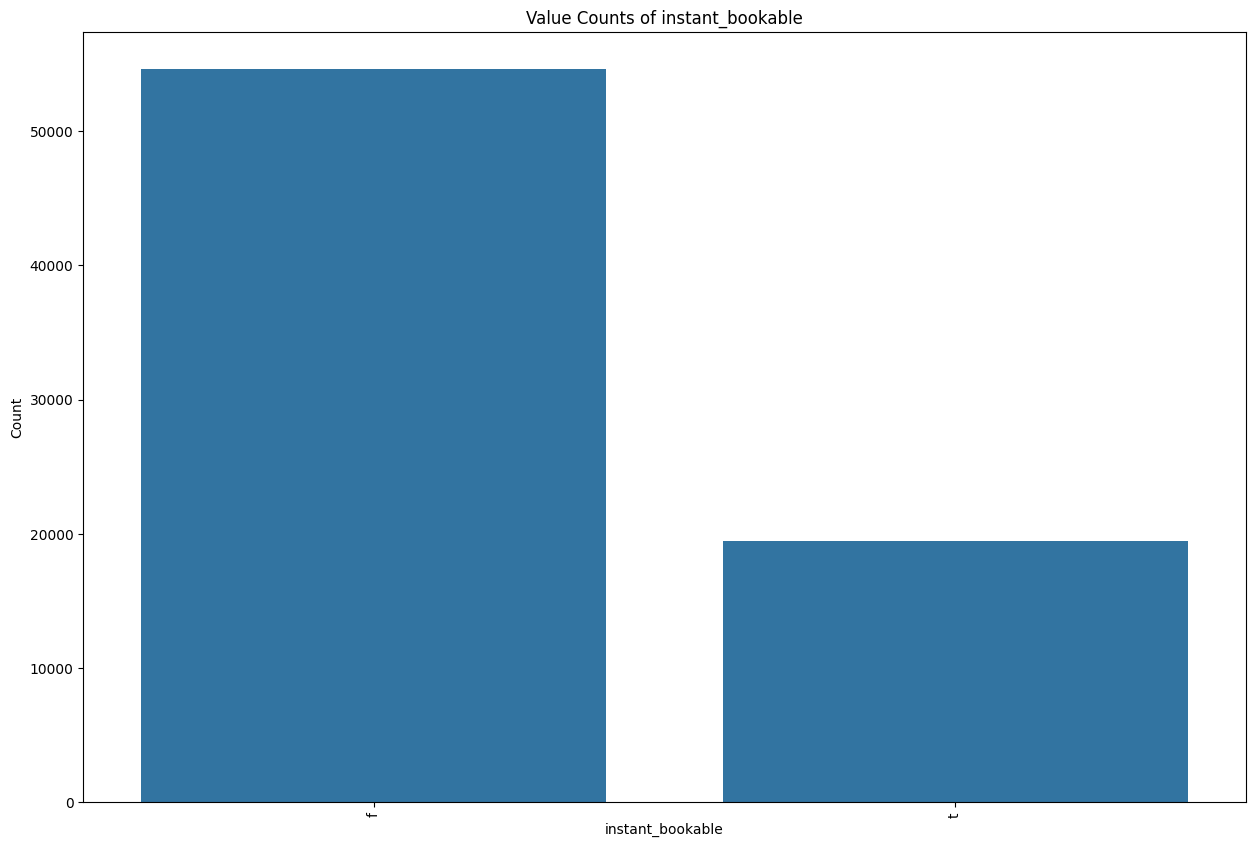

In [40]:
# Get list of categorical columns
categorical_columns = ['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable']
# Create value count plots for each categorical column
for col in categorical_columns:
    plt.figure(figsize=(15, 10))
    sns.countplot(x=col, data=df, order=df[col].value_counts(dropna=False).index)
    plt.title(f'Value Counts of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

In [41]:
print(df.columns)

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds',
       'Host_Tenure', 'Amenities_Count', 'Days_Since_Last_Review'],
      dtype='object')


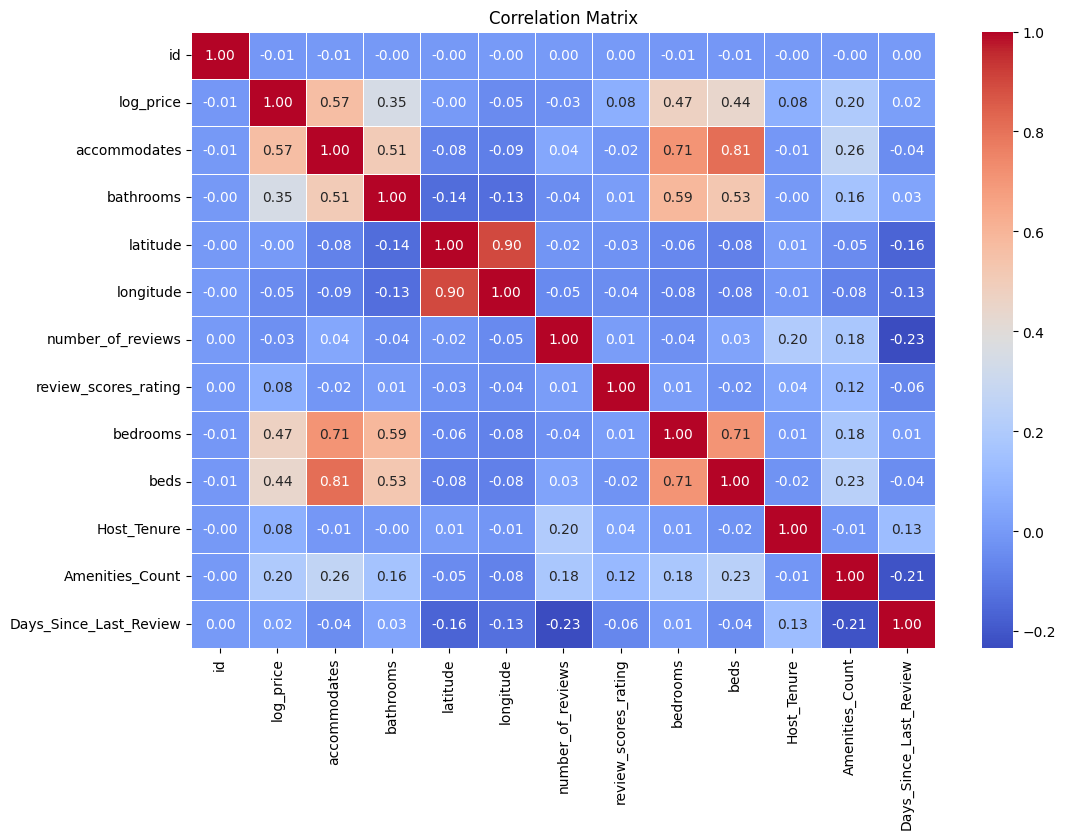

In [42]:
numerical_columns = df.select_dtypes(include=['int', 'float']).columns

# Analyze linear correlation between log_price and other numerical features
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

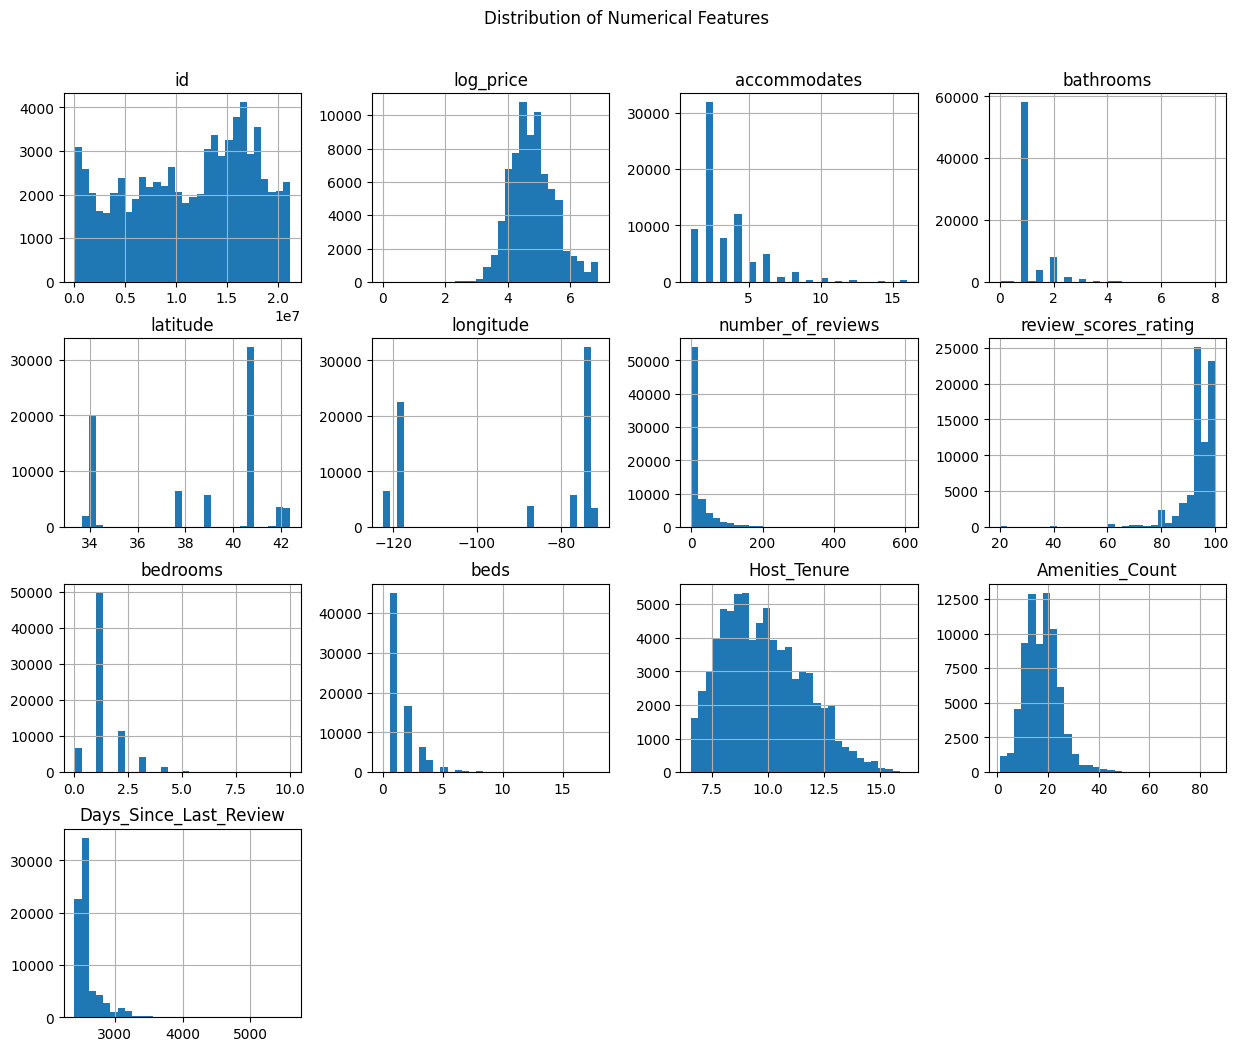

In [43]:
# Explore distribution of log_price and other numerical features
df[numerical_columns].hist(bins=30, figsize=(15, 12))
plt.suptitle('Distribution of Numerical Features', y=0.95)
plt.show()

# 3. Geospatial Analysis

Insights from Geospatial Analysis:
* Upon closer inspection over an approximate region in NYC, we can see all log_prices are either intermediate or a high value, with high being the general norm, suggesting high cost of living in NYC

<ipython-input-70-0242593aedab>:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


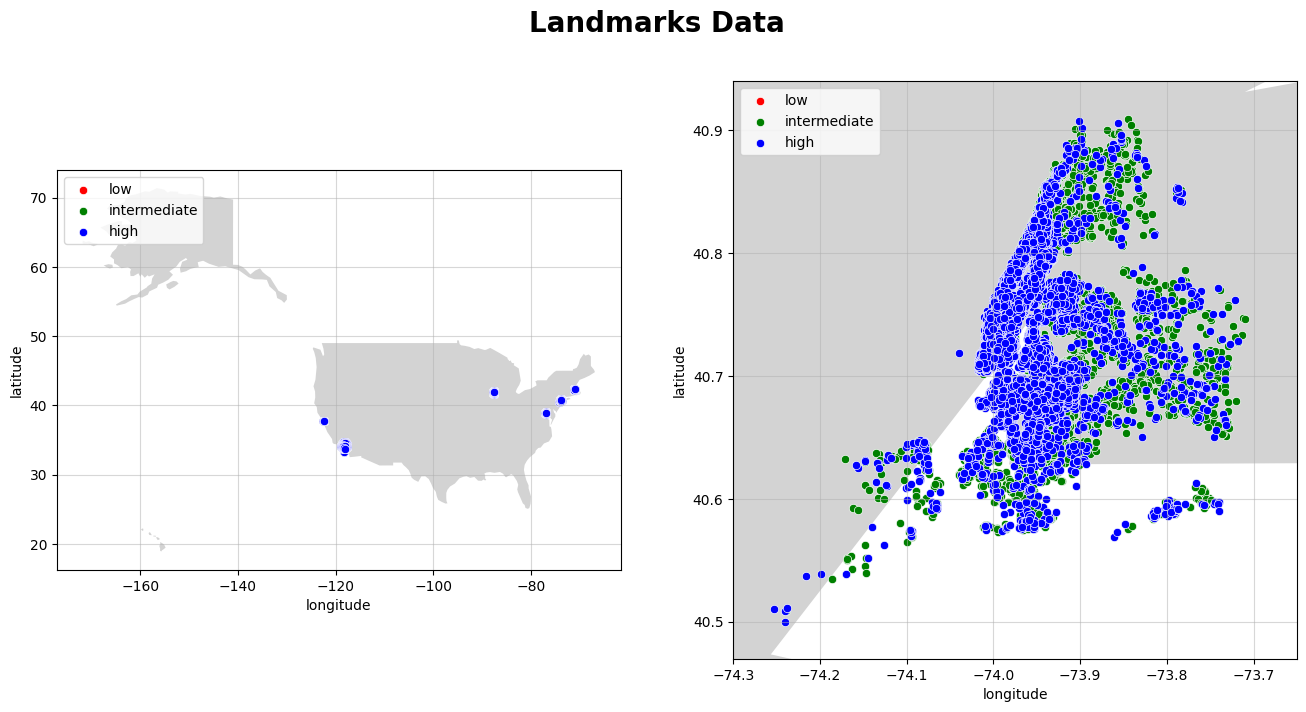

In [70]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Define the figure and axes
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 16))

# Read the world map data
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Plot the world map with light grey color
countries[countries["name"] == "United States of America"].plot(color="lightgrey", ax=ax[0])
countries[countries["name"] == "United States of America"].plot(color="lightgrey", ax=ax[1])

# Define the color map for different log_price classes
color_map = {1: "red", 2: "green", 3: "blue"}  # Define colors for three classes
labelVals= [None,"low","intermediate","high"]

# Assigning class based on log_price values
df['log_price_class'] = pd.cut(df['log_price'], bins=3, labels=[1, 2, 3])

# Plot landmarks with color coded based on log_price class
for i in range(1, 4):
    sns.scatterplot(x="longitude", y="latitude", data=df[df['log_price_class'] == i], ax=ax[0], color=color_map[i], label=f'{labelVals[i]}')
    sns.scatterplot(x="longitude", y="latitude", data=df[df['log_price_class'] == i], ax=ax[1], color=color_map[i], label=f'{labelVals[i]}')

# Set grid lines
ax[0].grid(visible=True, alpha=0.5)
ax[1].grid(visible=True, alpha=0.5)

# Set the limits for the second plot
ax[1].set_xlim([-74.3, -73.65])
ax[1].set_ylim([40.47, 40.94])

# Add legend
ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')

# Set the title
plt.suptitle("Landmarks Data", x=0.5, y=0.72, fontweight="bold", fontsize=20)

# Show the plot
plt.show()

# 4. Sentiment Analysis on Textual Data

To perform sentiment analysis on the description texts, the VADER (Valence Aware Dictionary and sEntiment Reasoner) sentiment analysis tool is used, which is specifically designed for analyzing sentiment in texts. It calculates sentiment scores for each description and incorporate them as features in the predictive model.

In [45]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER lexicon if not already downloaded
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to calculate sentiment scores for each description
def calculate_sentiment(text):
    sentiment_scores = sid.polarity_scores(text)
    return sentiment_scores['compound']  # Compound score ranges from -1 (negative) to 1 (positive)

# Apply sentiment analysis to the description column
df['description_sentiment'] = df['description'].apply(calculate_sentiment)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# 5. Amenities Analysis

Statistical methods such as student t-statistic and p-value statistic is used to analyze the relevance of amenities

Insights from obtained results:

- **Positive Associations:** Amenities with positive t-statistics and very low p-values (close to 0) indicate a strong positive association with higher log prices. For example, amenities like "Family/kid friendly," "TV," "Dryer," and "Indoor fireplace" have very high t-statistics and low p-values, suggesting that listings with these amenities tend to have higher log prices.

- **Negative Associations:** Conversely, amenities with negative t-statistics and very low p-values also have a strong association but with lower log prices. For instance, amenities like "Smoking allowed," "Pets live on this property," and "Lock on bedroom door" have high absolute t-statistics and low p-values, indicating that listings with these amenities tend to have lower log prices.

- **No Significant Associations:** Amenities with p-values close to 1 or higher than the significance level (usually 0.05) suggest that there's no statistically significant relationship between the presence of those amenities and log prices. These amenities may not influence pricing decisions significantly.

Overall, this analysis provides insights into which amenities are most strongly associated with higher or lower log prices in the dataset, which can inform pricing strategies and help prioritize amenities for listings.

In [46]:
from sklearn.preprocessing import MultiLabelBinarizer
from scipy.stats import ttest_ind

# Parse Amenities Column
df['amenities_list'] = df['amenities'].apply(lambda x: x.strip('{}').replace('"', '').split(','))

# Create Dummy Variables
mlb = MultiLabelBinarizer()
amenities_df = pd.DataFrame(mlb.fit_transform(df['amenities_list']), columns=mlb.classes_, index=df.index)

# Concatenate with original DataFrame
df = pd.concat([df, amenities_df], axis=1)

# Remove the original amenities column as it's no longer needed
df.drop(columns=['amenities'], inplace=True)

In [47]:
amenities_correlation = df.iloc[:, 69:].corrwith(df['log_price']).dropna().sort_values(ascending=False)

In [48]:
# Statistical Tests
significant_amenities = {}
for amenity in amenities_correlation.index:
    amenity_present = df[df[amenity] == 1]['log_price']
    amenity_not_present = df[df[amenity] == 0]['log_price']
    t_stat, p_value = ttest_ind(amenity_present, amenity_not_present)
    if p_value < 0.05:  # Significance level of 0.05
        significant_amenities[amenity] = {'t_statistic': t_stat, 'p_value': p_value}

# Print significant amenities
for amenity, stats in significant_amenities.items():
    print(f"Amenity: {amenity}, t-statistic: {stats['t_statistic']}, p-value: {stats['p_value']}")

Amenity: Family/kid friendly, t-statistic: 83.10287566457541, p-value: 0.0
Amenity: TV, t-statistic: 74.94378153964279, p-value: 0.0
Amenity: Dryer, t-statistic: 47.49865679062893, p-value: 0.0
Amenity: Indoor fireplace, t-statistic: 46.79877500505424, p-value: 0.0
Amenity: Washer, t-statistic: 45.691938004546635, p-value: 0.0
Amenity: Hair dryer, t-statistic: 32.64221451517295, p-value: 4.622980517565143e-232
Amenity: Private entrance, t-statistic: 31.494226695791962, p-value: 2.8146445199794256e-216
Amenity: Suitable for events, t-statistic: 31.162122283768873, p-value: 8.192109460864283e-212
Amenity: Iron, t-statistic: 31.08847770829263, p-value: 7.889623396415291e-211
Amenity: Gym, t-statistic: 31.050252925728106, p-value: 2.5510998283733744e-210
Amenity: Heating, t-statistic: 28.750440232474876, p-value: 8.861924225193659e-181
Amenity: Elevator, t-statistic: 27.965680146174627, p-value: 3.315326293724522e-171
Amenity: Kitchen, t-statistic: 27.884812760708982, p-value: 3.1066835112

# 6. Categorical Data Encoding

All categorical variables are converted using One-Hot Encoding

## Reason for One-Hot Encoding

1. **Binary Representation:**
   - One-Hot Encoding transforms categorical variables into a binary format, where each category is represented as a binary vector.

2. **Independence of Categories:**
   - One-Hot Encoding treats each category as independent of others, avoiding the issue of ordinality
   - By representing each category separately, it ensures that the model does not assume any inherent order or magnitude among them.

3. **Compatibility with Algorithms:**
   - Many machine learning algorithms, including linear models, tree-based models, and neural networks, require numerical input.
   - One-Hot Encoding converts categorical variables into a format that is compatible with these algorithms, allowing them to process categorical data effectively.

4. **Improved Model Performance:**
   - One-Hot Encoding enables the model to capture the full range of categorical variables without introducing bias or misleading interpretations.
   - By accurately representing categorical features, it contributes to improved model performance and generalization on unseen data.

In [49]:
# Encode categorical variables
df = pd.get_dummies(df, columns=['property_type', 'room_type'], drop_first=True)

In [50]:
df = pd.get_dummies(df, columns=['bed_type','city','cancellation_policy'])

In [51]:
categorical_columns = df.select_dtypes(include=['object']).columns

# Drop categorical columns
df = df.drop(columns=categorical_columns)

# 7. Model Development and Training

## Model Building Process and Rationale

1. **Linear Regression (Baseline Model):**
   - **Algorithm:** Linear Regression is chosen as the baseline model due to its simplicity and interpretability. It assumes a linear relationship between the independent variables and the target variable.
   - **Rationale:** Linear Regression provides a good starting point for understanding the basic relationships between features and the target variable. It's easy to implement and interpret, making it suitable for establishing a baseline performance.

2. **Random Forest:**
   - **Algorithm:** Random Forest is an ensemble learning method that operates by constructing a multitude of decision trees during training and outputting the mean prediction of the individual trees.
   - **Rationale:** Random Forest is chosen for its ability to handle non-linear relationships and interactions between features. It's robust to overfitting, works well with large datasets, and requires minimal feature preprocessing. Additionally, it provides feature importance scores, which can be useful for feature selection.

3. **Gradient Boosting:**
   - **Algorithm:** Gradient Boosting is another ensemble learning technique that builds a strong predictive model by combining multiple weak models in a stage-wise fashion.
   - **Rationale:** Gradient Boosting is particularly effective at capturing complex patterns in the data and tends to yield high predictive accuracy. It sequentially improves upon the weaknesses of previous models, making it suitable for capturing non-linear relationships and interactions. While it may require more computational resources and parameter tuning compared to Random Forest, it often provides better performance.

By incorporating both Random Forest and Gradient Boosting, the aim is to leverage the strengths of each algorithm to build a robust predictive model that can accurately estimate `log_price` based on the features in the dataset.


> **RESULT** : Below, without any initial hyperparamter tuning, the Random Forest Classifier has performed the best, with the least Mean Squared Error (MSE)

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Dropping columns with date information
date_columns = ['host_since', 'last_review']
df.drop(columns=date_columns, inplace=True)

# Define features (X) and target variable (y)
X = df.drop(columns=['log_price'])
y = df['log_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
# Baseline Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_pred)
print("Linear Regression MSE:", lr_mse)

Linear Regression MSE: 0.19415339935603879


In [55]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
print("Random Forest Mean Squared Error:", rf_mse)

Random Forest Mean Squared Error: 0.14314412096680257


In [56]:
# Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_pred)
print("Gradient Boosting Mean Squared Error:", gb_mse)

Gradient Boosting Mean Squared Error: 0.1619274142836543


# 8. Model Optimization and Validation
#### Grid Search Parameters

1. **Grid Search:** GridSearchCV is used to systematically search for the best combination of hyperparameters from a specified grid of values.
2. **Cross Validation (cv=5):** Cross-validation is employed with 5 folds to ensure the model's generalization performance. This helps to reduce overfitting and provides a more reliable estimate of the model's performance.

#### Random Forest Optimization and Validation
   
**Parameter Grid:**
   - **n_estimators:** The number of trees in the forest. By testing different values (10, 50, 100), aim is to find the optimal number of trees to balance model complexity and performance.
   - **max_depth:** The maximum depth of the trees. Different values (None, 2, 5) are explored to control the depth of each tree and prevent overfitting.

#### Gradient Boosting Optimization and Validation
   
**Parameter Grid:**
   - **n_estimators:** The number of boosting stages. different values are tested (100, 200, 300) to find the optimal number of boosting stages.
   - **learning_rate:** The shrinkage parameter that controls the contribution of each tree. Different values (0.01, 0.1, 0.5) are explored to balance between model complexity and learning rate.

By systematically exploring different combinations of hyperparameters and using cross-validation, aim is to identify the optimal settings for both Random Forest and Gradient Boosting models, ensuring they perform well on unseen data and generalize effectively.

> **RESULT:** Through Hyper-parameter tuning, we could improve the results of the Gradient Boosting method, where now, its performance is equivalent to that of Random Forest Classifier

In [57]:
from sklearn.model_selection import GridSearchCV, KFold

# Define a function for model optimization and validation
def optimize_and_validate_model(model, param_grid, X_train, y_train):
    # Perform Grid Search with k-fold Cross Validation
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=3)
    grid_search.fit(X_train, y_train)

    # Print the best hyperparameters found
    print("Best Parameters:", grid_search.best_params_)

    # Print the best mean squared error
    print("Best Mean Squared Error:", -grid_search.best_score_)

    return grid_search.best_estimator_

In [58]:
# Random Forest Optimization and Validation
rf_param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 2, 5]
}
rf_model = optimize_and_validate_model(RandomForestRegressor(random_state=42), rf_param_grid, X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters: {'max_depth': None, 'n_estimators': 100}
Best Mean Squared Error: 0.1485130932311159


In [59]:
# Gradient Boosting Optimization and Validation
gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5]
}
gb_model = optimize_and_validate_model(GradientBoostingRegressor(random_state=42), gb_param_grid, X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters: {'learning_rate': 0.5, 'n_estimators': 200}
Best Mean Squared Error: 0.14628205019989743


# 9. Feature Importance and Model Insights

Insights from Feature Importances
## a. Linear Regression:
  In linear regression, the coefficient values represent the weight or importance of each feature in predicting the target variable (in this case, log price). A positive coefficient indicates that an increase in the feature value leads to an increase in the predicted log price, while a negative coefficient suggests the opposite.

  Based on the feature importance table obtained for Linear Regression:

  - **city_Boston, city_NYC, city_DC, city_Chicago, city_LA, city_SF:** These are dummy variables representing different cities. Positive coefficients for cities like Boston, NYC, and DC indicate that listings located in these cities tend to have higher log prices compared to the other cities. Conversely, negative coefficients for cities like LA and SF suggest that listings in these cities tend to have lower log prices.

  - **property_type_Parking Space:** This feature represents whether the property type is a parking space. The positive coefficient suggests that listings with a property type of parking space tend to have slightly higher log prices.

  - **Other Features:** Similar interpretations can be made for other features in the table. Positive coefficients indicate a positive relationship with log price, while negative coefficients suggest a negative relationship.

It's essential to note that the magnitude of the coefficient also matters. Larger coefficient values indicate a stronger impact on the predicted log price. Therefore, features with larger absolute coefficient values have a more substantial influence on the model's predictions.

## b. Random Forest Classifier
  In Random Forest, feature importance indicates how much each feature contributes to reducing the impurity (e.g., Gini impurity or entropy) when making decisions at each node of the trees in the forest. Features with higher importance values are considered more influential in making predictions.

  Based on the provided feature importance table:

  - **room_type_Private room, bedrooms, longitude, latitude, room_type_Shared room:** These are the top five most important features according to the Random Forest model.

      - room_type_Private room and room_type_Shared room are dummy variables representing different room types. The importance suggests that the type of room significantly influences the model's predictions. Private rooms have a higher importance compared to shared rooms.
      
      - bedrooms is a numerical feature representing the number of bedrooms. It's essential in predicting log prices, indicating that larger accommodations tend to have higher prices.
      
      - longitude and latitude are geographical coordinates. Their importance suggests that the location of the property (longitude and latitude) plays a crucial role in determining log prices.

  - **Other Features:** The importance values for other features indicate their relative contribution to the model. Features with low or zero importance contribute less to the model's predictive power.

It's important to consider that feature importance values in Random Forest are relative to each other within the model and are not inherently interpretable in the same way as coefficients in linear regression. However, they provide valuable insights into which features the model relies on most heavily for making predictions.

## c. Gradient Boosting
In Gradient Boosting, feature importance represents the contribution of each feature to the model's overall predictive performance. Features with higher importance values have a more significant impact on the model's ability to make accurate predictions.

Based on the provided feature importance table:

- **room_type_Private room, bedrooms, longitude, accommodates, room_type_Shared room:** These are the top five most important features according to the Gradient Boosting model.

    - room_type_Private room and room_type_Shared room are dummy variables representing different room types. The importance suggests that the type of room significantly influences the model's predictions. Private rooms have a higher importance compared to shared rooms.
    
    - bedrooms is a numerical feature representing the number of bedrooms. It's essential in predicting log prices, indicating that larger accommodations tend to have higher prices.
    
    - longitude and accommodates are geographical and numerical features, respectively. Their importance suggests that the location of the property (longitude) and the capacity of accommodation (accommodates) play crucial roles in determining log prices.

- **Other Features:** The importance values for other features indicate their relative contribution to the model. Features with low or zero importance contribute less to the model's predictive power.

It's important to note that feature importance values in Gradient Boosting are relative and do not have a direct interpretation like coefficients in linear regression. However, they provide insights into which features the model relies on most heavily for making predictions.


In [60]:
# Extract feature coefficients from the trained Linear Regression model
coefficients = lr_model.coef_

# Create a DataFrame to display feature coefficients alongside feature names
feature_importance_lr = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients})
feature_importance_lr = feature_importance_lr.sort_values(by='Coefficient', ascending=False)

# Display feature importance
print(feature_importance_lr)

                         Feature  Coefficient
186                  city_Boston    20.591848
190                     city_NYC    17.650361
188                      city_DC    14.554665
187                 city_Chicago     3.892691
168  property_type_Parking Space     0.734820
..                           ...          ...
179       room_type_Private room    -0.560347
180        room_type_Shared room    -0.981322
5                      longitude    -0.987338
189                      city_LA   -26.659086
191                      city_SF   -30.030480

[197 rows x 2 columns]


In [61]:
# Extract feature importances from the trained RandomForest model
importances_rf = rf_model.feature_importances_

# Create a DataFrame to display feature importances alongside feature names
feature_importance_rf = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances_rf})
feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)

# Display feature importance
print(feature_importance_rf)

                                 Feature    Importance
179               room_type_Private room  2.857798e-01
8                               bedrooms  1.242717e-01
5                              longitude  9.344172e-02
4                               latitude  8.168169e-02
180                room_type_Shared room  6.135944e-02
..                                   ...           ...
75                             Hand soap  2.923625e-09
25                            Bath towel  2.133886e-09
129                         Toilet paper  0.000000e+00
165             property_type_Lighthouse  0.000000e+00
137  Wide clearance to shower and toilet  0.000000e+00

[197 rows x 2 columns]


In [62]:
# Extract feature importances from the trained GradientBoosting model
importances_gb = gb_model.feature_importances_

# Create a DataFrame to display feature importances alongside feature names
feature_importance_gb = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances_gb})
feature_importance_gb = feature_importance_gb.sort_values(by='Importance', ascending=False)

# Display feature importance
print(feature_importance_gb)

                      Feature  Importance
179    room_type_Private room    0.314686
8                    bedrooms    0.163989
5                   longitude    0.115779
1                accommodates    0.101046
180     room_type_Shared room    0.075139
..                        ...         ...
162         property_type_Hut    0.000000
64                       Flat    0.000000
164      property_type_Island    0.000000
165  property_type_Lighthouse    0.000000
61              Firm mattress    0.000000

[197 rows x 2 columns]


# 10. Predictive Performance Assessment:

## Model Performance Comparison

| Model             | Root Mean Squared Error (RMSE) | R-squared (R2) |
|-------------------|--------------------------------|----------------|
| Linear Regression | 0.4406                         | 0.6136         |
| Random Forest     | 0.3783                         | 0.7151         |
| Gradient Boosting | 0.3777                         | 0.7161         |


## Analysis:

- Both Random Forest and Gradient Boosting outperform Linear Regression in terms of both RMSE and R-squared. This suggests that these ensemble methods capture the nonlinear relationships and interactions between features more effectively than linear regression.

- Gradient Boosting performs slightly better than Random Forest, with a slightly lower RMSE and slightly higher R-squared. This indicates that Gradient Boosting provides the best balance between predictive accuracy and model complexity among the three models tested.

- Overall, Gradient Boosting appears to be the most suitable model for estimating log prices in this dataset, followed closely by Random Forest. However, the choice between these two models may depend on factors such as computational resources, interpretability, and specific requirements of the problem at hand.

In [63]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def predictivePerformance(model):
  # 1. Evaluate on Test Set
  y_pred = model.predict(X_test)

  # 2. Calculate Metrics
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  r2 = r2_score(y_test, y_pred)

  print("Root Mean Squared Error (RMSE):", rmse)
  print("R-squared (R2):", r2)

  # 3. Residual Analysis
  residuals = y_test - y_pred

  # Plotting residuals
  plt.figure(figsize=(8, 6))
  plt.scatter(y_test, residuals, alpha=0.5)
  plt.xlabel("Actual Log Price")
  plt.ylabel("Residuals")
  plt.title("Residual Analysis")
  plt.axhline(y=0, color='r', linestyle='--')
  plt.show()

Root Mean Squared Error (RMSE): 0.44062841414965376
R-squared (R2): 0.6135505166643864


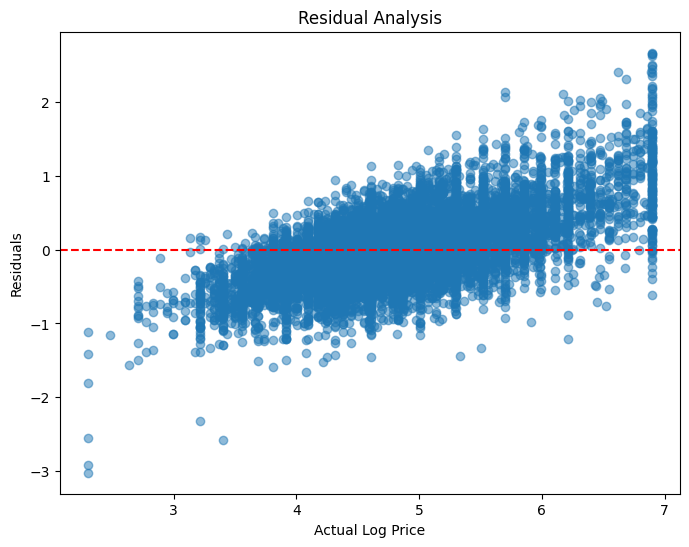

In [64]:
predictivePerformance(lr_model)

Root Mean Squared Error (RMSE): 0.3783439188976117
R-squared (R2): 0.7150811071367891


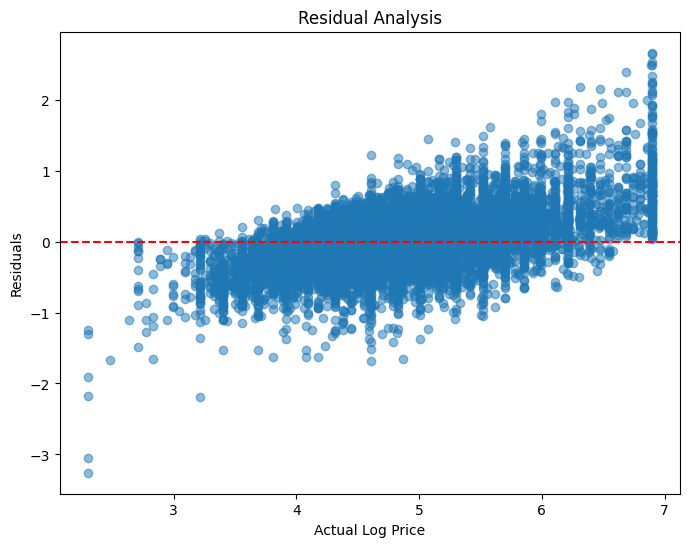

In [65]:
predictivePerformance(rf_model)

Root Mean Squared Error (RMSE): 0.37769372903795706
R-squared (R2): 0.7160595407102982


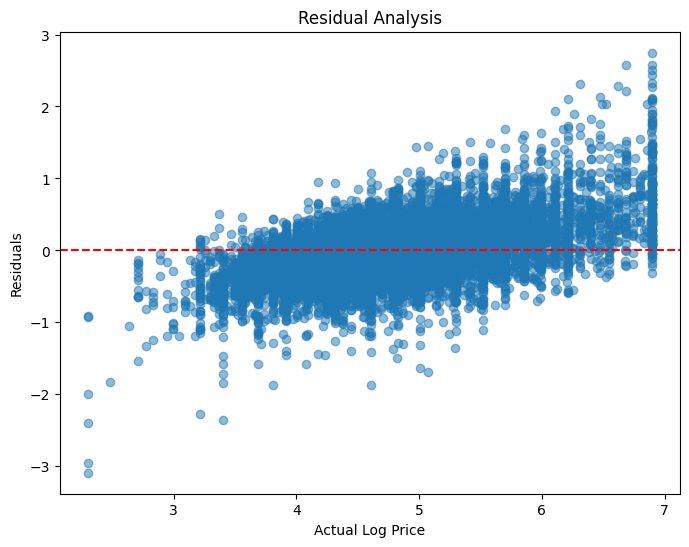

In [66]:
predictivePerformance(gb_model)

# Summary:
## 1. Methodology
1. All 10 tasks provided are implemented as required

## 2. Findings and Insights:

1. Model Performance: Gradient Boosting outperformed both Linear Regression and Random Forest in terms of both RMSE and R-squared. This suggests that Gradient Boosting captures the nonlinear relationships and interactions between features more effectively.
2. Feature Importance: In all three models, features related to the type of room (private or shared) and the number of bedrooms were consistently among the most important features for predicting log prices. This indicates that factors such as room type and size play a significant role in determining the price of listings.
3. Amenities Impact: Certain amenities, such as Family Friendly, TV, dryer, indoor fireplace, and washer, showed a strong positive correlation with listing prices, as indicated by high t-statistics and low p-values. This suggests that offering these amenities can potentially justify higher prices for listings.

## Actionable Recommendations:
1. Pricing Strategy:
Implement dynamic pricing strategies based on geographical location and neighborhood characteristics.
2. Amenities Enhancement:
Prioritize and invest in amenities which are geographically preferred and are strongly correlated with higher prices.
3. Model Development:
Further refine predictive models using advanced techniques like ensemble learning techniques to combine multiple models and improve overall predictive accuracy. Can also apply regularization techniques such as Lasso and Ridge regression to prevent overfitting and improve model robustness.
4. Market Differentiation:
Identify unique selling points of listings in each region and leverage them for competitive advantage.